# Rapid EDA 2 - Spotify 2023

In [25]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot settings
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14

In [26]:
# Read in the data
spotify = pd.read_csv("data/spotify-2023.csv", encoding="latin-1")

In [27]:
# Look at the first couple of rows
spotify.head(2)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4


In [28]:
# Look at the null values and data type information
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [29]:
# Look at the summary statistics for numerical data
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [30]:
# Look at the summary statistics for categorical data
spotify.describe(include='O')

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,953,903,858,953
unique,943,645,949,348,198,11,2
top,Numb,Taylor Swift,156338624,0,0,C#,Major
freq,2,34,2,24,344,120,550


In [31]:
# Look at number of null values
spotify[['in_shazam_charts','key']].isna().sum()

in_shazam_charts    50
key                 95
dtype: int64

#### Initial thoughts
Already, the key and the mode columns are piqueing my interest.
Some initial questions to start with:
- What are the top streamed tracks for tracks released in each month of 2023?
- ~~Which artists are in over 10,000 spotify playlists?~~ What is the distribution of tracks with over 1 billion streams?
- What is the distribution of major and minor songs?

In [32]:
# Fill any missing values with 'Unknown'
spotify_clean = spotify.fillna('Unknown')

In [33]:
# Some trouble in the streams column, what is causing it to be labeled as a string data type?
spotify_clean['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [34]:
# Get rid of the row that's causing problems
weird_row = spotify_clean['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'
spotify_clean.drop(spotify_clean[weird_row].index, inplace=True)

# Check to make sure the row is now gone
spotify_clean['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [35]:
# Convert the data type of streams to integers
spotify_clean['streams'] = spotify_clean['streams'].astype(np.int64)

In [36]:
# What are the top streamed tracks released in each month in 2023?
year_2023 = spotify_clean[spotify_clean['released_year'] == 2023]
top_streams_by_month_2023 = year_2023.groupby('released_month')['streams'].max()

year_2023.loc[year_2023['streams'].isin(top_streams_by_month_2023)][['track_name', 'released_month','streams']]

,track_name,released_month,streams
0,Seven (feat. Latto) (Explicit Ver.),7,141381703
4,WHERE SHE GOES,5,303236322
5,Sprinter,6,183706234
6,Ella Baila Sola,3,725980112
10,un x100to,4,505671438
12,Flowers,1,1316855716
34,TQG,2,618990393


<Axes: xlabel='mode', ylabel='count'>

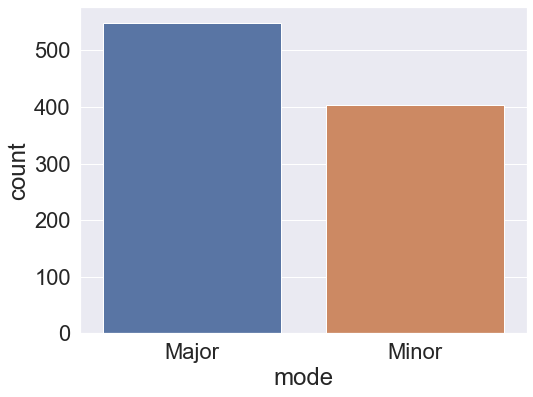

In [39]:
# What is the distribution of major and minor songs?
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=spotify_clean, x='mode')

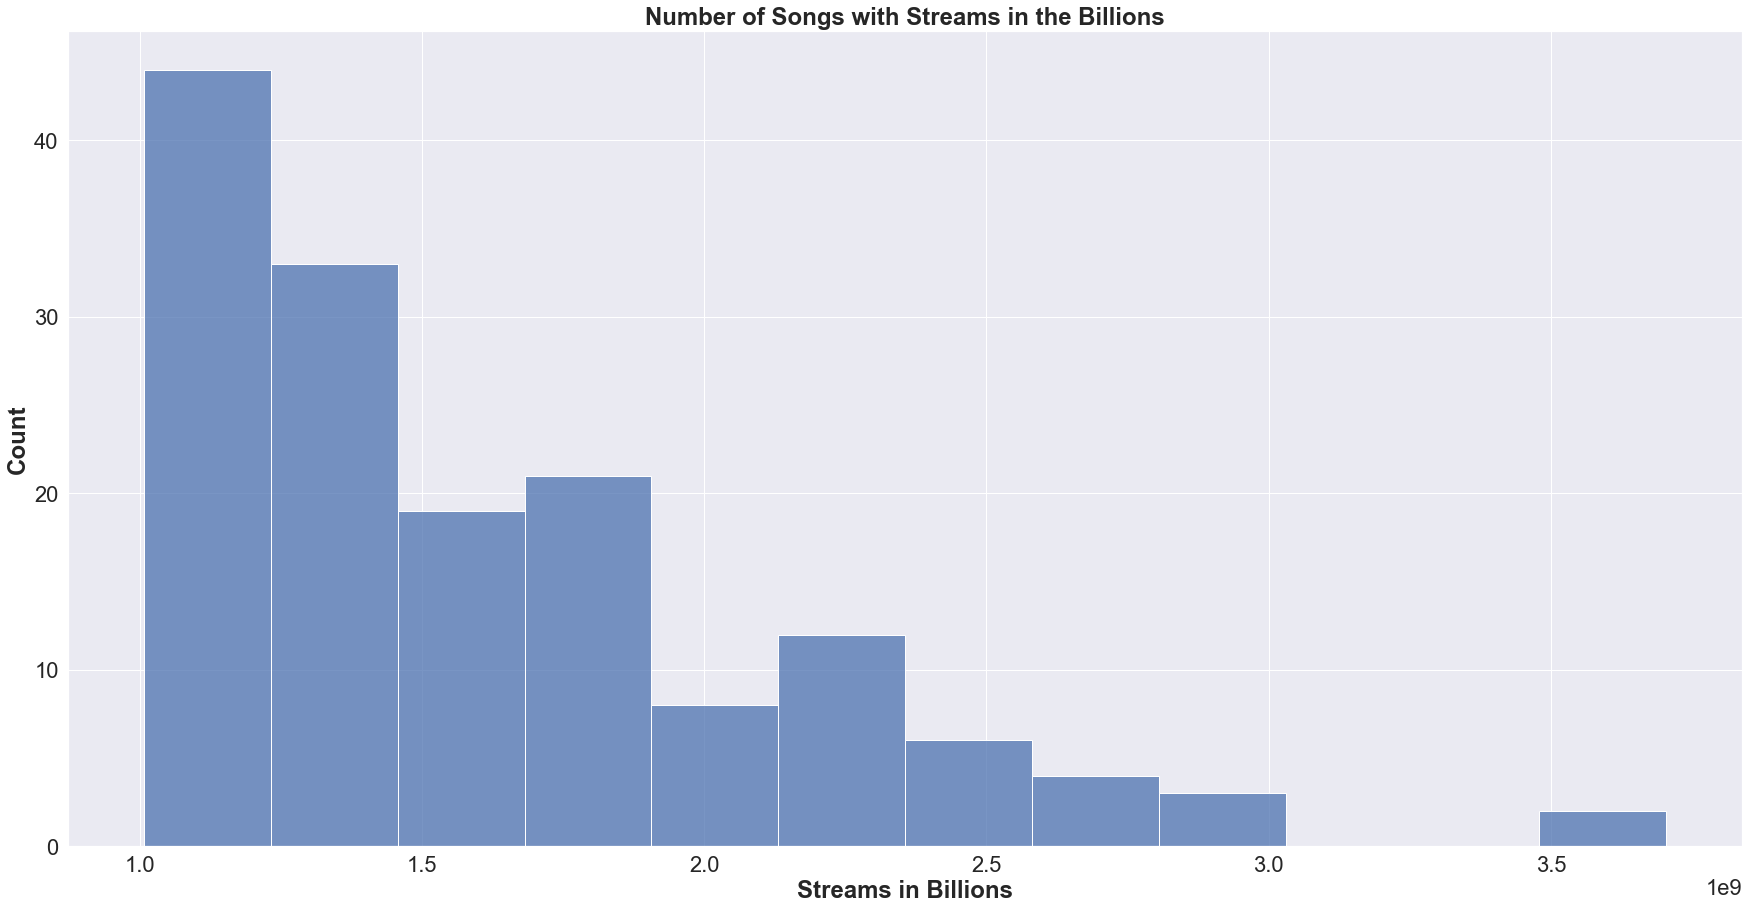

In [44]:
# What is the distribution of streams over 1 billion?
over_10m_streams = spotify_clean[spotify_clean['streams'] >= 1000000000]
fig, ax = plt.subplots(figsize=(30, 15))
sns.histplot(data=over_10m_streams, x='streams')
ax.set_xlabel('Streams in Billions', fontdict={'weight':'bold'})
ax.set_title('Number of Songs with Streams in the Billions', fontdict={'weight':'bold'})
ax.set_ylabel('Count', fontdict={'weight':'bold'});